In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin

import tensorflow as tf
from tensorflow.python.ops import array_ops

from tfshow import show_graph
from emp_risk_optimizer import LinearRegression2Blocks

In [3]:
df = pd.read_csv('data/lm_10.csv')
X = df.values[:, 0:10]
n, p = X.shape
y = df.values[:, -1].reshape(n, 1)
X.shape, y.shape

((100, 10), (100, 1))

In [4]:
model = LinearRegression2Blocks(
    model_name='LinearRegression2Blocks',
    eta=0.001)
model.fit(X,y,n_iter=10000)

Step 0: loss = 159.76263428 (0.022 sec)
Step 1000: loss = 3.74636054 (0.001 sec)
Step 2000: loss = 1.26415896 (0.000 sec)
Step 3000: loss = 1.15221691 (0.000 sec)
Step 4000: loss = 1.14269876 (0.000 sec)
Step 5000: loss = 1.14170265 (0.000 sec)
Step 6000: loss = 1.14159214 (0.000 sec)
Step 7000: loss = 1.14158034 (0.000 sec)
Step 8000: loss = 1.14157879 (0.000 sec)
Step 9000: loss = 1.14157844 (0.001 sec)


LinearRegression2Blocks(eta=0.001)

In [7]:
eval_dict = model.get_eval()

In [17]:
def serialize(eval_dict):
    json_dict = dict()
    for k, val in eval_dict.items():
        if type(val) is np.ndarray:
            if k is not 'hessian':
                json_dict[k] = val.reshape(1, val.shape[0]).tolist()
            else:
                json_dict[k] = val.tolist()
        elif type(val) is dict:
            json_dict[k] = dict()
            for k2, val2 in eval_dict[k].items():
                if type(val2) is np.ndarray:
                    json_dict[k][k2] = val2.reshape(
                        1, val2.shape[0]).tolist()
    return json_dict

print(json.dumps(serialize(eval_dict), sort_keys=True,
                 indent=4, separators=(',', ': ')))
                

{
    "grads_stacked": [
        [
            5.8535486459732056e-05,
            -5.9528276324272156e-05,
            -5.955388769507408e-05,
            7.467344403266907e-06,
            -0.00011874735355377197,
            0.00023788819089531898,
            -9.719096124172211e-05,
            1.0929536074399948e-05,
            -0.00047526415437459946,
            -5.9410929679870605e-05
        ]
    ],
    "hessian": [
        [
            2.200401544570923,
            0.17178967595100403,
            0.0929451435804367,
            0.14230161905288696,
            0.20249924063682556,
            0.15792062878608704,
            0.1309083104133606,
            -0.04896029457449913,
            0.11864030361175537,
            0.011660950258374214
        ],
        [
            0.17178967595100403,
            2.1775078773498535,
            -0.059429917484521866,
            -0.0675651803612709,
            -0.6154240369796753,
            0.19090338051319122,
            

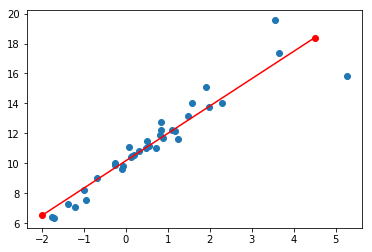

In [30]:
plt.plot(X[:,1], y, 'o')
plt.plot([-2, 4.5], [y1, y2], 'o', color='red')
_ = plt.plot([-2, 4.5], [y1, y2], color='red')